<a href="https://colab.research.google.com/github/CamiloLon/Evaluacion_2021-1/blob/main/1000417189/Examen_01_1000417189.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [1]:
import pandas as pd
import numpy as np
df=pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [2]:
df['smax']=df['solution'].apply(lambda f: max(map(abs,f)))
df['smax']

0          6
1          4
2          6
3          7
4          8
          ..
390069    32
390070    28
390071    32
390072    31
390073    23
Name: smax, Length: 390074, dtype: int64

In [3]:
df['sum_s']=df['solution'].apply(lambda f: sum(f))

df['sum_s³']=df['solution'].apply(lambda f: sum(np.array(f)**3))
df

,l,k,solution,gcd,n,smax,sum_s,sum_s³
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje  x  y en el eje  y  del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: plt.ylim(ymin,ymax) ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo

POLINOMIO: 
    8     7      6      5      4      3      2
2 x + 8 x - 11 x - 12 x + 16 x + 17 x - 21 x - 30 x + 31 

RAÍCES: [-4.82882283+0.j        -1.30202395+0.j        -0.83818341+0.9009331j
 -0.83818341-0.9009331j  0.83960398+0.8593034j  0.83960398-0.8593034j
  1.12800564+0.j         1.        +0.j       ] 

RAÍCES REALES: [-4.82882283+0.j -1.30202395+0.j  1.12800564+0.j  1.        +0.j] 

DERIVADA:     7      6      5      4      3      2
16 x + 56 x - 66 x - 60 x + 64 x + 51 x - 42 x - 30 



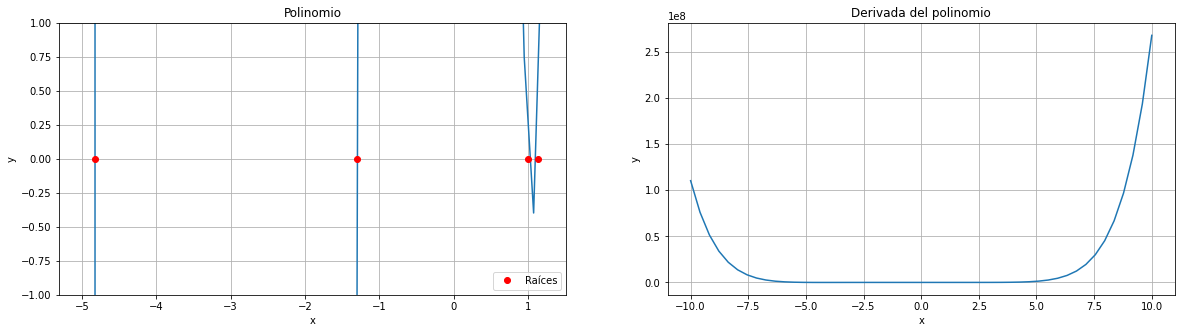

In [4]:
import random as rd
import matplotlib.pyplot as plt
from scipy import diff

rt=rd.seed(1000417189)
a=rd.randint(0,390073)
fila=df.iloc[a]

pol=np.poly1d(fila['solution'])
print('POLINOMIO: \n', pol,'\n')
print('RAÍCES:', pol.roots,'\n')

roots=(pol.roots[[0,1,-2,-1]])
print('RAÍCES REALES:', roots,'\n')

xarr=np.linspace(-5,1.2)

print('DERIVADA:',pol.deriv(),'\n')

plt.figure(figsize=(20,5))

plt.subplot(121)

plt.plot(xarr,pol(xarr))
plt.plot(roots.real,pol(roots.real),'ro', label='Raíces')
plt.grid()
plt.ylim(-1,1)
plt.title('Polinomio')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

xarr=np.linspace(-10,10)
plt.subplot(122)
plt.plot(xarr,pol(xarr))
plt.plot()
plt.grid()
plt.title('Derivada del polinomio')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [5]:
rd.seed(1000417189)
print(rd.randint(1,5))
p=rd.random()
print(p)

f=lambda x: np.cos(x)/x+p

5
0.8996970389837926


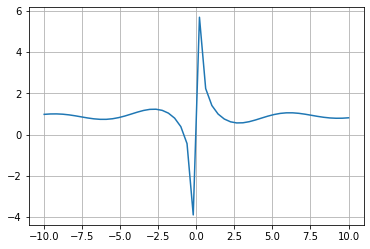

In [6]:
xarr=np.linspace(-10,10)


plt.plot(xarr,f(xarr))
plt.grid()

La solución es: -0.7857008430158093 



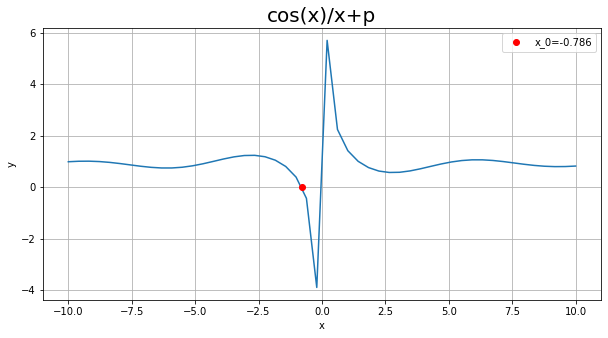

In [7]:
from scipy import optimize
xo=optimize.newton(f,-1)
print('La solución es:', xo,'\n')
plt.figure(figsize=(10,5))

plt.plot(xarr,f(xarr))
plt.plot(xo,f(xo),'ro', label='x_0='+ str("%.3lf"%xo))
plt.grid()
plt.title('cos(x)/x+p',{'fontsize':20})
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()